# **Importing Libraries**

In [110]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [54]:
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import pydot 
from IPython.display import Image

# **Loading Datasets**

In [55]:
amz_all=pd.read_csv('https://raw.githubusercontent.com/DeepanNarayanaMoorthy/Effect-of-COVID-19-pandemic-on-E-commerce/master/datasets/master/amz_all.csv')
flip_pan=pd.read_csv('https://raw.githubusercontent.com/DeepanNarayanaMoorthy/Effect-of-COVID-19-pandemic-on-E-commerce/master/datasets/flip_pan.csv')

In [56]:
star1=flip_pan['star1']
star2=flip_pan['star2']
star3=flip_pan['star3']
star4=flip_pan['star4']
star5=flip_pan['star5']
buyability=[]
for i in range(len(star1)):
  buyability.append((star1[i]*(1/15))+(star2[i]*(2/15))+(star3[i]*(3/15))+(star4[i]*(4/15))+(star5[i]*(5/15)))
flip_pan['buyability']=buyability
for i in flip_pan.columns[3:]:
  flip_pan[i]=[int(k) if k !=-1 else 0 for k in flip_pan[i]]

flip_pan

,url,product,name,mrp,discounted,star5,star4,star3,star2,star1,buyability
0,https://www.flipkart.com/vebnor-100-units-disp...,facemasks,VeBNoR 100 Units Disposable 3 Layer Pharmaceut...,800,249,2874,1488,1006,357,608,1644
1,https://www.flipkart.com/wildcraft-hypashield-...,facemasks,Wildcraft HypaShield Supermask reusable outdoo...,600,429,37659,24539,11441,3904,6035,22307
2,https://www.flipkart.com/godrej-protekt-p-w95-...,facemasks,Godrej Protekt P-W95 Reusable Face Mask Large ...,480,336,2310,1390,594,188,226,1299
3,https://www.flipkart.com/nea-cotton-3-layer-pr...,facemasks,NEA COTTON 3-LAYER PROTECTIVE REUSABLE FACE Ma...,299,249,6,2,1,1,0,2
4,https://www.flipkart.com/van-heusen-vhmsbrgb65...,facemasks,Van Heusen VHMSBRGB651658 Cloth Mask With Melt...,499,424,192,91,35,9,7,96
...,...,...,...,...,...,...,...,...,...,...,...
1435,https://www.flipkart.com/mirah-belle-green-app...,handwash,mirah belle Green Apple Hand Wash Can (5 LTR) ...,2000,999,0,0,0,0,0,0
1436,https://www.flipkart.com/intercorp-fomy-antiba...,handwash,Intercorp Fomy Antibacterial Soft Refreshing F...,597,369,0,0,0,0,0,0
1437,https://www.flipkart.com/himalaya-tulsi-aloe-m...,handwash,Himalaya tulsi and aloe moisturizing hand wash...,240,178,0,0,0,0,0,0
1438,https://www.flipkart.com/biofresh-fda-approved...,handwash,Biofresh FDA APPROVED Lemon &amp; Tulsi Handwa...,600,369,0,0,0,0,0,0


In [57]:
star1=amz_all['star1']
star2=amz_all['star2']
star3=amz_all['star3']
star4=amz_all['star4']
star5=amz_all['star5']
buyability=[]
for i in range(len(star1)):
  a=(star1[i]*(1/15))+(star2[i]*(2/15))+(star3[i]*(3/15))+(star4[i]*(4/15))+(star5[i]*(5/15))
  try:
    a=int(a)
  except:
    a=0
  buyability.append(a)
amz_all['buyability']=buyability
for i in amz_all.columns[3:]:
  where_are_NaNs = list(np.isnan(np.array(amz_all[i])))
  amz_all[i][where_are_NaNs] = 0
amz_all=amz_all.drop(['index'],axis=1)
amz_all

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,product,name,mrp_now,price_now,star1,star2,star3,star4,star5,mrp_then,price_then,buyability
0,facemasks,SURGICOMFORT Non Woven Elastic Ear-Loop Dispos...,1000.0,151.0,24.0,9.0,13.0,14.0,24.0,0.0,0.0,17
1,facemasks,Mediweave Reusable 100% Cotton Cloth Face Mask...,499.0,324.0,27.0,12.0,15.0,17.0,27.0,0.0,0.0,19
2,facemasks,RSM 3 Layer Non-Woven Disposable Medical Face ...,349.0,249.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,facemasks,Steelbird SBA-2 7Wings Unisex Helmet Visor Fac...,898.0,799.0,61.0,3.0,6.0,25.0,61.0,0.0,0.0,32
4,facemasks,Vocado 5 Layer Filter Protection Face Mask Kn9...,399.0,121.0,19.0,11.0,14.0,16.0,19.0,0.0,0.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...
732,medical equipment,Mra Fashion N95 / PM 2.5 Anti Pollution Mask |...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
733,medical equipment,SG HEALTH N95 Kids pollution dust mask Pink,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
734,medical equipment,TrendzOn Anti-Virus 3Ply Disposable Face Masks...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
735,medical equipment,Aptechdeals 5Pcs SURGICAL MASK with Ear Loop 3...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,499.0,199.0,0


# **Logistic Regression**

## **Flipkart**

In [111]:
X=flip_pan[flip_pan.columns[3:-1]]
y=flip_pan['buyability']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=85)
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
y.pred

0.7708333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## **Amazon**

In [59]:
X=amz_all[amz_all.columns[2:-1]]
y=amz_all['buyability']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=85)
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8495934959349594


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# **Support Vector Machine**

## **Flipkart**

### **Split Dataset**

In [60]:
y=flip_pan['buyability']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(flip_pan[flip_pan.columns[3:]], y, test_size=0.25, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_test.head()

(1080, 8)
(1080,)
(360, 8)
(360,)


,mrp,discounted,star5,star4,star3,star2,star1,buyability
34,750,249,4103,2803,1350,486,863,2507
1061,5000,2298,0,0,0,0,0,0
1256,200,179,0,0,0,0,0,0
333,299,222,0,0,0,0,0,0
141,320,177,475,277,240,120,230,311


### **Normalize Features**

In [62]:
scaler = StandardScaler() #normalize means we neewd to give a range in which it is expecting
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train[:5,:]

array([[-0.20477257, -0.01755109, -0.1946756 , -0.18144195, -0.19624542,
        -0.21842401, -0.22747433, -0.19366317],
       [-0.23272981, -0.08960489,  0.1896702 ,  0.19812474,  0.20977959,
         0.03677635,  0.12394793,  0.18770783],
       [-0.09568452, -0.17171272, -0.19155084, -0.17663731, -0.19624542,
        -0.19522398, -0.22747433, -0.19366317],
       [-0.05895638, -0.1834424 ,  0.16779686,  0.09722726,  0.15794661,
         0.15277651,  0.34885818,  0.15163219],
       [-0.04031822, -0.19014508,  1.44582477,  0.96206275,  1.26371687,
         1.45197835,  1.69831965,  1.30605251]])

### **Training SVM**

In [63]:
clf = svm.SVC(kernel='sigmoid') #scikit learn support vector classifier
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### **Decision Boundary**

In [64]:
y_pred = clf.predict(X_train)
print(y_pred)
print(accuracy_score(y_train, y_pred))

[ 0 30  0 ...  0  0  0]
0.7601851851851852


### **SVM Kernels**

In [65]:
for k in ('linear', 'poly','rbf','sigmoid'):
    clf = svm.SVC(kernel=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(k)
    print(accuracy_score(y_train, y_pred))

linear
0.8111111111111111
poly
0.7916666666666666
rbf
0.7888888888888889
sigmoid
0.7601851851851852


### **Instantiating the Best Model**

In [66]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### **Testing Set Prediction**

In [67]:
flip_pred = np.array([X_test.iloc[0]])
flip_pred = scaler.transform(flip_pred) #normalizing these features
print(clf.predict(flip_pred))
print(y_test.iloc[0])

[2222]
2507


### **Accuracy on Testing Set**

In [68]:
X_test = scaler.transform(X_test)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7472222222222222


### **Comparison to All-Zero Prediction**

In [69]:
y_zero = np.zeros(y_test.shape)
print(accuracy_score(y_test, y_zero))

0.7361111111111112


### **Precision and Recall**

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       265
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         1
          38       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Amazon**

### **Split Dataset**

In [71]:
y=amz_all['buyability']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(amz_all[amz_all.columns[2:]], y, test_size=0.25, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_test.head()

(552, 10)
(552,)
(185, 10)
(185,)


,mrp_now,price_now,star1,star2,star3,star4,star5,mrp_then,price_then,buyability
196,760.0,0.0,0.0,0.0,0.0,0.0,0.0,760.0,459.0,0
187,1000.0,875.0,0.0,0.0,0.0,0.0,0.0,1000.0,859.0,0
14,199.0,179.0,48.0,4.0,10.0,25.0,48.0,0.0,0.0,28
31,199.0,89.0,31.0,11.0,14.0,19.0,31.0,0.0,0.0,21
545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### **Normalize Features**

In [73]:
scaler = StandardScaler() #normalize means we neewd to give a range in which it is expecting
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train[:5,:]

array([[-0.37511683, -0.33528466, -0.36380704, -0.31103196, -0.33641708,
        -0.36499064, -0.36380704,  3.47490714,  2.14857627, -0.3909947 ],
       [ 0.09727449,  0.29356923, -0.36380704, -0.31103196, -0.33641708,
        -0.36499064, -0.36380704, -0.30293206, -0.35434896, -0.3909947 ],
       [-0.37511683, -0.33528466, -0.36380704, -0.31103196, -0.33641708,
        -0.36499064, -0.36380704, -0.24645336, -0.23575798, -0.3909947 ],
       [ 0.18083427,  0.24504655, -0.36380704, -0.31103196, -0.33641708,
        -0.36499064, -0.36380704, -0.22756417, -0.25959536, -0.3909947 ],
       [-0.20799726, -0.33528466,  3.10861062, -0.31103196,  3.01134313,
         3.37592142,  3.10861062, -0.30293206, -0.35434896,  3.28073862]])

### **Training SVM**

In [74]:
clf = svm.SVC(kernel='sigmoid') #scikit learn support vector classifier
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### **Decision Boundary**

In [75]:
y_pred = clf.predict(X_train)
print(y_pred)
print(accuracy_score(y_train, y_pred))

[ 0  0  0  0 17 17  0 17  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0 17
  0  0  0  0  0  0  0  0  0  0  0 17  0 17  0 17  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 17  0 17  0 17  0  0  0  0  0  0
 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0
  0  0  0  0  0  0  0  0 17 17  0  0  0 17  0  0  0  0 17  0  0  0  0 17
  0  0  0  0  0  0  0  0 17  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 17  0  0  0 17  0  0 17  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0 17  0  0 17  0 17  0 17
  0  0  0  0  0 17 17  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0 17  0  0
  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0 17  0  0 17  0  0
  0  0  0 17  0  0  0  0  0  0  0  0 17  0  0  0 17 17  0  0  0 17  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0 17  0  0  0  0  0
 17  0  0  0  0  0  0  0  0  0  0  0 17 17  0 17  0

### **SVM Kernels**

In [76]:
for k in ('linear', 'poly','rbf','sigmoid'):
    clf = svm.SVC(kernel=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(k)
    print(accuracy_score(y_train, y_pred))

linear
0.9655797101449275
poly
0.9873188405797102
rbf
0.9257246376811594
sigmoid
0.8695652173913043


### **Instantiating the Best Model**

In [77]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### **Testing Set Prediction**

In [78]:
flip_pred = np.array([X_test.iloc[0]])
flip_pred = scaler.transform(flip_pred) #normalizing these features
print(clf.predict(flip_pred))
print(y_test.iloc[0])

[0]
0


### **Accuracy on Testing Set**

In [79]:
X_test = scaler.transform(X_test)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8648648648648649


### **Comparison to All-Zero Prediction**

In [80]:
y_zero = np.zeros(y_test.shape)
print(accuracy_score(y_test, y_zero))

0.8324324324324325


### **Precision and Recall**

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       154
           8       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         2
          24       0.25      0.33      0.29         3
          25       0.25      0.33      0.29         3
          26       1.00      0.33      0.50         3
          27       0.00      0.00      0.00         1
          28       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Decision Trees**

## **Amazon**

In [82]:
y=amz_all['buyability']
X=[]
for i in range(len(list(amz_all['star1']))):
  X.append([amz_all['mrp_now'][i], amz_all['price_now'][i], amz_all['star1'][i], amz_all['star2'][i],amz_all[ 'star3'][i], amz_all['star4'][i],amz_all[ 'star5'][i],
       amz_all['mrp_then'][i], amz_all['price_then'][i]])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=85)
dtc = DecisionTreeClassifier()   
dtc.fit(X_train, y_train)  
from sklearn.metrics import accuracy_score
y_pred = dtc.predict(X_test) 
accuracy_score(y_test, y_pred)


0.8658536585365854

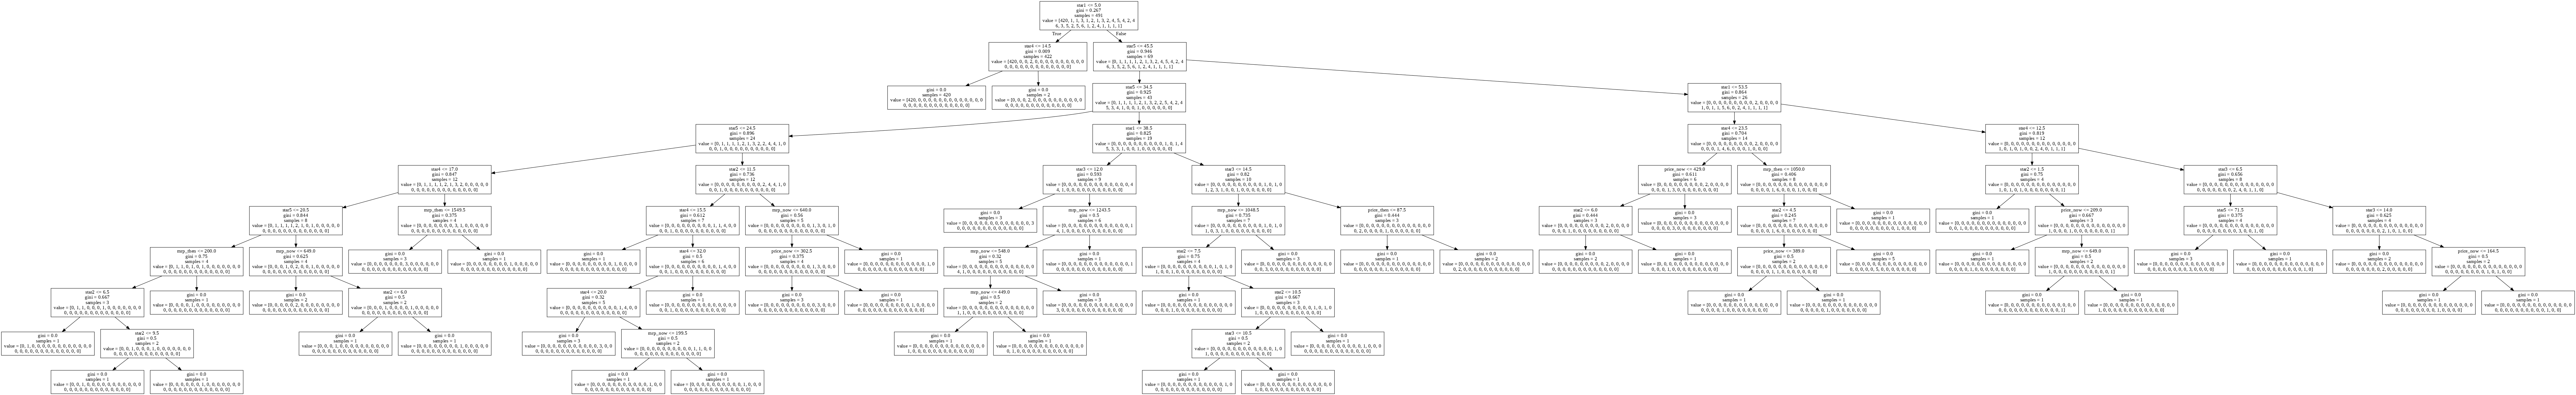

In [84]:
amz_dec = StringIO() 
tree.export_graphviz(dtc, out_file = amz_dec, feature_names = list(amz_all.columns[2:-1])) 
(graph,) = pydot.graph_from_dot_data(amz_dec.getvalue())
graph.set_size('"100,100!"')
Image(graph.create_png())

### **Avoiding Overfitting**

In [85]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor() 
from sklearn.model_selection import GridSearchCV
gs_inst = GridSearchCV(dtr, param_grid = {'max_depth': [3,5,7,9,20]},cv=10) 
gs_inst.fit(X_train, y_train) 
gs_inst.best_estimator_
DecisionTreeRegressor(criterion='mse', max_depth=3, 
                      max_features=None, max_leaf_nodes=None, 
                      min_impurity_split=1e-07, min_samples_leaf=1, 
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') 
y_pred = gs_inst.predict(X_test)

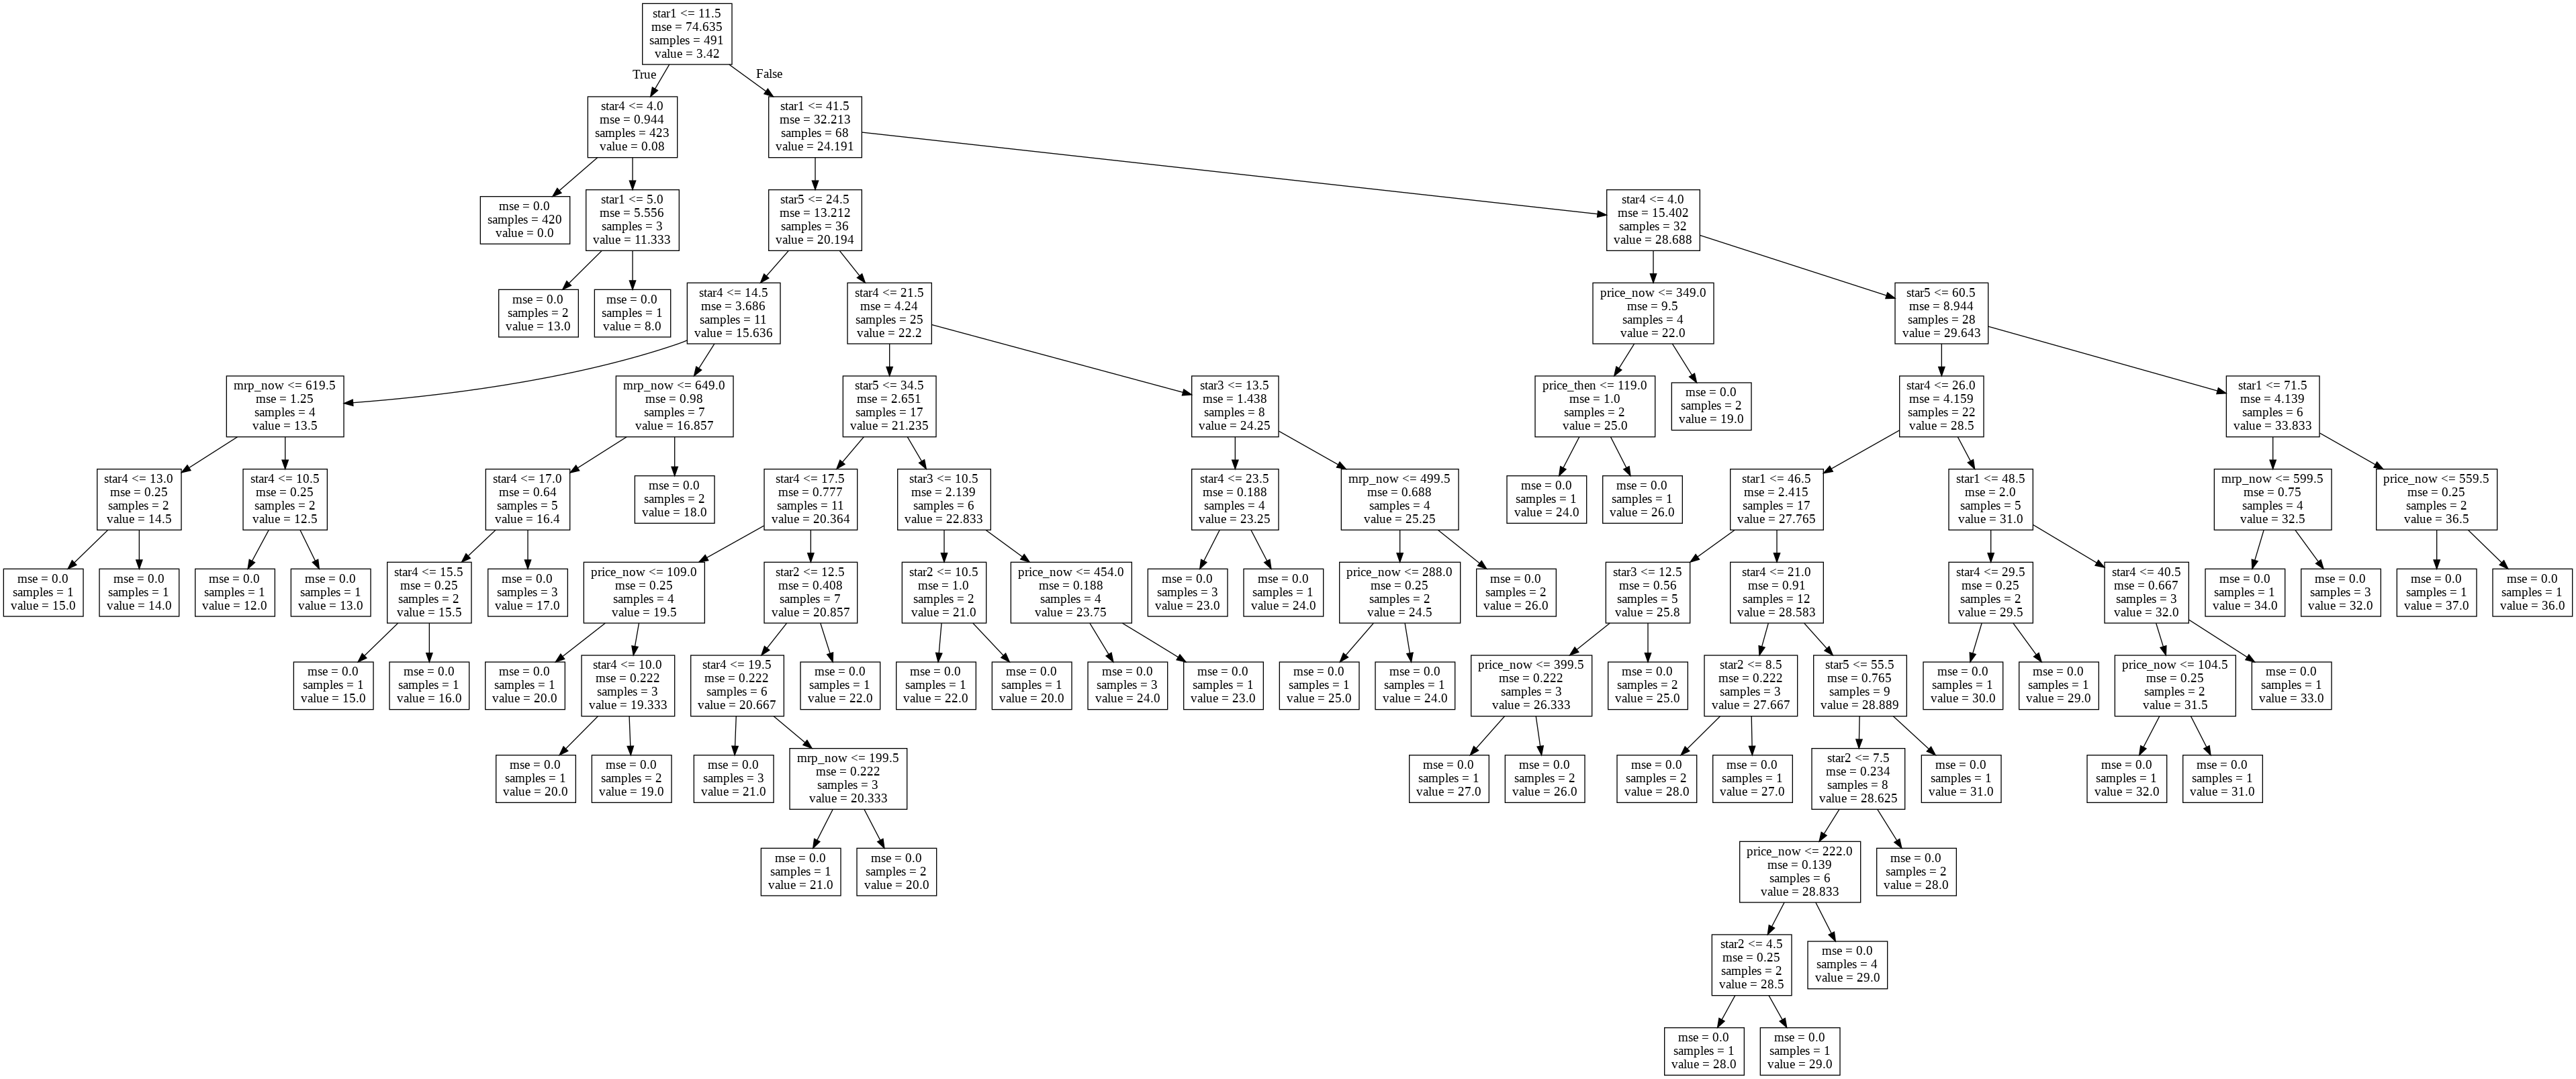

In [86]:
import numpy as np 
from sklearn import tree 
from sklearn.externals.six import StringIO
import pydot 
from IPython.display import Image
amz_dec = StringIO() 
tree.export_graphviz(gs_inst.best_estimator_, out_file = amz_dec, feature_names = list(amz_all.columns[2:-1])) 
(graph,) = pydot.graph_from_dot_data(amz_dec.getvalue())
Image(graph.create_png())

## **Flipkart**

In [87]:
y=flip_pan['buyability']
X=[]
for i in range(len(list(flip_pan['star1']))):
  X.append([flip_pan[j][i] for j in flip_pan.columns[3:-1]])

In [88]:
flip_pan.columns[3:-1]

Index(['mrp', 'discounted', 'star5', 'star4', 'star3', 'star2', 'star1'], dtype='object')

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=85)
dtc = DecisionTreeClassifier()   
dtc.fit(X_train, y_train)  
from sklearn.metrics import accuracy_score
y_pred = dtc.predict(X_test) 
accuracy_score(y_test, y_pred)


0.84375

In [90]:
flip_dec = StringIO() 
tree.export_graphviz(dtc, out_file = flip_dec, feature_names = list(flip_pan.columns[3:-1])) 
(graph,) = pydot.graph_from_dot_data(flip_dec.getvalue())
graph.set_size('"100,100!"')
Image(graph.create_png())

### **Avoiding Overfitting**

In [91]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor() 
from sklearn.model_selection import GridSearchCV
gs_inst = GridSearchCV(dtr, param_grid = {'max_depth': [3,5,7,9,20]},cv=10) 
gs_inst.fit(X_train, y_train) 
gs_inst.best_estimator_
DecisionTreeRegressor(criterion='mse', max_depth=3, 
                      max_features=None, max_leaf_nodes=None, 
                      min_impurity_split=1e-07, min_samples_leaf=1, 
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') 
y_pred = gs_inst.predict(X_test)

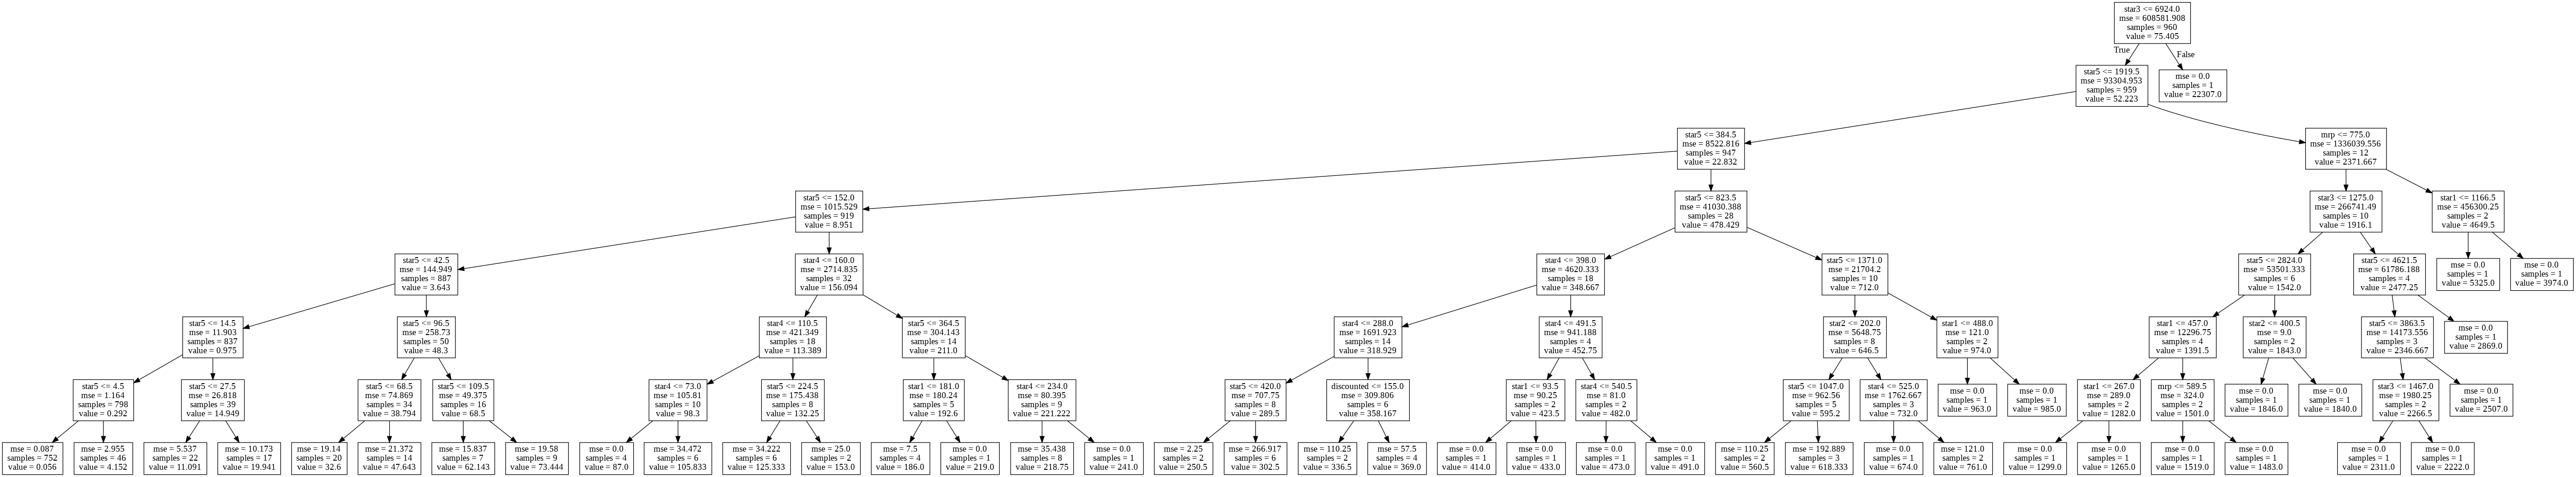

In [92]:
import numpy as np 
from sklearn import tree 
from sklearn.externals.six import StringIO
import pydot 
from IPython.display import Image
flip_dec = StringIO() 
tree.export_graphviz(gs_inst.best_estimator_, out_file = flip_dec, feature_names = list(flip_pan.columns[3:-1])) 
(graph,) = pydot.graph_from_dot_data(flip_dec.getvalue())
Image(graph.create_png())